# Script 5 - Unconstrained Ordination

# Librairies

In [2]:
library(ade4)
library(vegan)

Loading required package: permute



# Loading data and removing empty site 8

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>

In [3]:
# Load the Doubs data
load("Doubs.RData")
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]

# 1 Principal Component Analysis (PCA) -> *rda(),scores(),summary(),pca_object$\$$CA$\$$eig,screenplot(),biplot()*

<div style="border: 5px solid green; padding: 15px; border-radius: 0px;">
  <h1 style="color: green; font-weight: bold; text-align: center;">1 Principal Component Analysis (PCA)</h1>
  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
      <ul>
        <li>Reduces <strong>high-dimensional data<strong style="color: green;"> into fewer components</li>
        <li>First components capture the <strong>maximum variance</strong></li>
        <li>Useful for <strong>visualization</strong> and <strong style="color: green;">dimensionality reduction</strong></li>
      </ul>
    </div>
    <div style="flex: 1; text-align: center;">
      <img src="images/Script5_PCA.png" alt="PCA Example" style="max-width: 90%;">
    </div>
  </div>
</div>


<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 1</span><br/>

  <div style="display: flex; align-items: flex-start;">
  <div style="flex: 1;">
    Is the following statement true or false?<br/> <br/>
    <em>
      <strong>PCA maintains the distances (Euclidean) between objects
in reduced space<strong> <br/><br/>
    </em>
  </div>
</div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) True</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) False </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  1) True</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) False</label><br/>
</form>

  </div>
</details>





<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 2</span><br/>

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1;">
    Is the following statement true or false?<br/> <br/>
    <em>
      <strong>When computing a PCA, the descriptors should be quantitative, and if they are measured on different scales, they must be standardized.<strong> <br/><br/>
    </em>
  </div>
</div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) True</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) False </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  1) True</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) False</label><br/>
</form>

<p><strong>PCA is based on calculating variances and covariances between variables. If the descriptors have different units or value ranges, those with larger scales will disproportionately influence the principal components. Standardization (centering and scaling) puts all variables on the same scale, allowing PCA to capture the overall structure without bias from differing variable scales.</strong></p>


  </div>
</details>



<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 3</span><br/>


  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        For which type of data, is the PCA generally adequate ? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Community Data</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Environnemental Data </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="2"> 1) Community Data</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) Environnemental Data</label><br/>
</form>

<p><strong>PCA is not well suited for Community Data due to the double-zero problem: two species absent in two samples appear artificially similar, which can mislead the analysis.</strong></p>


  </div>
</details>



### 1.0.1 PCA computation based on a dataframe  -> ***rda**( `df` , `TRUE/FALSE`)*

*PCA computation based on a Dataframe* 

- **`df`** → *Dataframe on which we compute the PCA*  
- **`TRUE/FALSE`** → *Argument scale*:  
  - `"TRUE"`:  variables are standardized (PCA on correlation matrix)
  - `"FALSE"`: variables are not standardized (PCA on covariance matrix)
    
**outputs :**

- **Inertia (explained variance)** :

  - `"Total"`: Total variance explained by all variables 
  - `"Unconstrained"`: Total variance explained, specifying that this is an unconstrained analysis

    
- **Rank** :

  - `"Unconstrained"`: Number of possible non-null principal components (rank of data matrix)

  
- **Inertia is correlations (if argument scale = `TRUE`)** :  inertia is based on correlations (standardized variables), so PCA is done on correlation matrix
- **Inertia is variance (if argument scale = `FALSE`)** : inertia is based on variances (covariances) without standardization

- **Eigenvalues for unconstrained axes:** : Each eigenvalue (PC1, PC2, etc.) corresponds to the variance explained by that principal component

## 1.1 Compute PCA on env data

In [4]:
# Compute PCA on env data
# Standardize variables (scale = TRUE)
env.pca <- rda(env, scale = TRUE)
#Show the outputs
env.pca


Call: rda(X = env, scale = TRUE)

              Inertia Rank
Total              11     
Unconstrained      11   11

Inertia is correlations

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11 
6.098 2.167 1.038 0.704 0.352 0.319 0.165 0.112 0.023 0.017 0.006 


<div style="border: 5px solid green; padding: 15px; border-radius: 0px;">
  <h1 style="color: green; font-weight: bold; text-align: center;">1.0.2 Summary</h1>
  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
      <h3 style="color: green;">Partitioning of Correlations</h3>
      <ul>
        <li> <strong>Total Inertia </strong> : total variance present in a dataset</li>
        <li><strong>Unconstrained </strong> : part of the variance that is explained only by the internal structure of the data </li>
      </ul>  
      <h3 style="color: green;">Eigenvalues</h3>
      <ul>
        <li><strong>Eigenvalue</strong>: measures the amount of variance captured by each axis.</li>
        <li><strong>Proportion Explained</strong>: share of variance explained by the axis.</li>
        <li><strong>Cumulative Proportion</strong>: sum of explained proportions, shows the cumulative variance captured by the first axes.</li>
      </ul>
    </div>
    <div style="flex: 1; text-align: center;">
      <img src="images/Script5_summary.png" alt="Summary Example" style="max-width: 90%;">
    </div>
    
  </div>
</div>


### 1.0.2 Display a summary of the PCA components -> ***summary**(`pca_object`)*

- **`pca_object`** → *PCA computed using rda()*  
- **`summary()`** → *Show the summary of the PCA components*
    
**outputs :**

- **Eigenvalues, and their contribution to the correlations** :

  - `"Eigenvalue"`:  Eigenvalue of each principal component (PC1, PC2, PC3, PC4). It represents the amount of variance explained by that component. 
  - `"Proportion Explained "`: The proportion of the total variance explained by each individual principal component.
  - `"Cumulative Proportion"`: The cumulative proportion of variance explained by adding successive principal components.



## 1.2 Display PCA summary of the env data

In [ ]:
#Show the summary of the PCA components
summary(env.pca) 

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
        <h3 style="color: green; font-weight: bold;">1.0.3 Score of each observation/variable</h3>
    </div>
    <div style="display: flex; justify-content: center; gap: 20px;">
        <img src="images/Script5_coordinate_species.png" style="width: 50%;">
        <img src="images/Script5_coordinate_sites.png" style="width: 50%;">
    </div>
</div>


### 1.0.3 Examine and plot PCA output -> ***scores**(`pca_object`, display = "")*

- **`pca_object`** → *PCA result computed using rda()*  
- **`display`** → *What to display:*
  
  - `"sites"`:  scores of the observations (rows of the data)
  - `"species"`: scores of the variables (columns)
  - `"bp"`: scores of the biplot arrows (variables)
    
**outputs :**

- **Eigenvalues, and their contribution to the correlations** :

  - `"Scores of sites (observations)"`: coordinates of each observation (sample) on the principal components axes.
                    These are the positions of your samples in the PCA space.
  - `"Scores of species (variables)"`: coordinates of variables in the PCA space, showing their contribution and correlation to the axes.

## 1.2 Compute PCA scores on env data

In [ ]:
# Examine and plot PCA output
scores(env.pca, display = "sites")

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
        <h3 style="color: green; font-weight: bold;">1.0.4 Eigenvalues of PCA (CA$eigenvalue)</h3>
    </div>
    <img src="images/Script5_eigenvalue.png" style="width: 35%; margin-top: 10px;">
</div>


### 1.0.4 Get the eigen values of the PCA output -> ***pca_object$ \$ $CA$ \$ $eig***

- **`pca_object`** → *PCA result computed using rda()*  

**outputs :**

- **Eigenvalues** :

  - The vector **pca_object$\$$CA$\$$eig** contains the eigenvalues of each principal component. Each eigenvalue represents the amount of variance explained by its corresponding principal component.

## 1.3 Extract the eigenvalues from the PCA result

In [ ]:
# Extract the eigenvalues from the PCA result
ev <- env.pca$CA$eig
# Display the eigenvalues
ev
# Calculate and display the total variance explained (sum of eigenvalues)
sum(ev)

<div style="border: 5px solid green; padding: 15px; border-radius: 0px;">
  <h1 style="color: green; font-weight: bold; text-align: center;">1.0.5 Scree Plot with Broken Stick Model</h1>
  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 10px;">
      <ul>
        <li>Visualizes the <strong>explained variance</strong> of each principal component</li>
        <li>The <strong>Broken Stick model</strong> line represents variance explained by a random model</li>
        <li>Principal components that explain less variance than the random (broken stick) model <strong>should not be interpreted</strong> (the model provides a reference to select important components)</li>
      </ul>
    </div>
    <div style="flex: 1; text-align: center;">
      <img src="images/Script5_Screenplot.png" alt="Scree Plot with Broken Stick" style="max-width: 100%;">
    </div>
  </div>
</div>


### 1.0.5 Screenlot PCA eigenvalues -> ***screeplot**(`pca_object`, bstick = `TRUE`, npcs = length(pca_object$\$$CA$\$$eig))*

- **`pca_object`** → *PCA result computed using rda()*  
- **`bstick`** → *Logical argument:*
  
  - `"TRUE"`:  adds broken-stick model values as a reference line
  - `"FALSE"`: no broken-stick model shown
    
- **`npcs`** → *Number of principal components to display on the screeplot (usually all eigenvalues)*


**Outputs :** 

- **Barplot of eigenvalues** :

  - Visual representation of the amount of variance explained by each principal component.
 
- **Broken-stick model (if bstick = TRUE)** :
  - Broken stick model: The red reference line is the variance explianed by a random model, principal axes which explain less variance than a random model (broken stick) should not be interpreted


## 1.4 Screeplot of the env.pca

In [ ]:
# Set plot size in Jupyter Notebook (10 x 7 inches)
options(repr.plot.width = 10, repr.plot.height = 7)

# Create a scree plot of the PCA eigenvalues from env.pca
screeplot(env.pca, bstick = TRUE, npcs = length(env.pca$CA$eig))

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
        <h3 style="color: green; font-weight: bold;">1.0.6 PCA plot</h3>
    </div>
    <div style="display: flex; justify-content: space-between; align-items: flex-start; margin-top: 30px;">
        <img src="images/Script5_PCA_plot.png" style="width: 45%;">   
    <ul style="text-align: left; font-size: 14px; width: 50%; margin-left: 20px;margin-top: 49px;">
        <li><span style="color: green;"><strong>Observations</strong></span> that are close together →  similar profiles</li>
        <li><span style="color: blue;"><strong>Variables</strong></span> that are close together →  positively correlated</li>
        <li><span style="color: blue;"><strong>Variables</strong></span> pointing in opposite directions →  negatively correlated</li>
        <li>An <span style="color: green;"><strong>observation</strong></span> located near a <span style="color: blue;"><strong>variable</strong></span> → has a high value for that <span style="color: blue;"><strong>variable</strong></span></li>
        <li>The coordinate of a <span style="color: blue;"><strong>variable</strong></span> on a principal component (e.g. PC1) indicates how strongly it contributes to that axis — a high coordinate means a strong contribution</li>
    </ul>
    </div>
</div>


### 1.0.6 Ploting PCA -> ***plot**(pca_object, choices=c(a,b))*

- **`pca_object`** → *PCA result computed using rda()*
  
- **`choices`** → *Vector indicating which principal components to plot on the axes*
  
  - `"c(a, b)"`: means plot PC a on x-axis and PC b on y-axis


**Outputs :** 

- **Scatter plot of samples or sites** :

  - Positions of observations projected on the selected principal component axes.
 
- **Scatter plot of variables** :

  - Variables are displayed as red points, indicating their contribution and direction on the PCA axes.



## 1.5 Plot of the env.pca

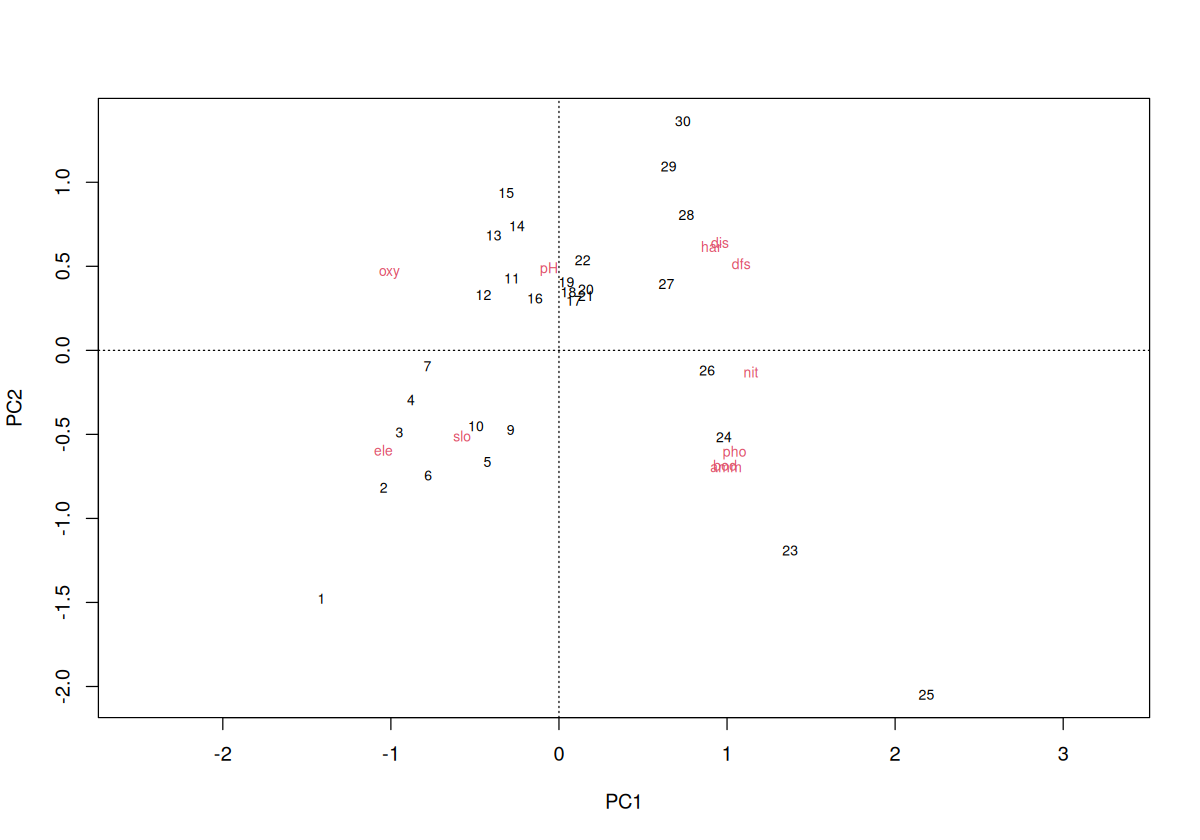

In [5]:
# Set plot size in Jupyter Notebook (10 x 7 inches)
options(repr.plot.width = 10, repr.plot.height = 7)

# Plot the PCA results showing the first principal component (PC1) on the x-axis
# and the second principal component (PC2) on the y-axis
plot(env.pca, choices = c(1, 2))


<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
        <h3 style="color: green; font-weight: bold;">1.0.7 PCA biplot</h3>
    </div>
 <!-- Scaling 1 -->
    <div style="display: flex; justify-content: space-between; align-items: flex-start; margin-top: 30px;">
        <img src="images/Script5_Biplot_scaling1.png" style="width: 45%;">   
        <div style="text-align: left; font-size: 14px; width: 50%; margin-left: 20px; margin-top: 20px;">
            <h2><strong>Scaling 1</strong></h2>
            <ul>
                <li>Focuses on <span style="color: purple;"><strong>observations/sites</strong></span> structure</li>
                <li>Preserves distances between <span style="color: purple;"><strong>observations/sites</strong></span></li>
                <li>distances between <span style="color: purple;"><strong>observations/sites</strong></span> are meaningful → close points = similar profiles</li>
                <li> directions of <span style="color: orange;"><strong>variables</strong></span> are informative, but lengths and angles are less reliable</li>
            </ul>
        </div>
    </div>
<!-- Scaling 2 -->
    <div style="display: flex; justify-content: space-between; align-items: flex-start; margin-top: 30px;">
        <img src="images/Script5_Biplot_scaling2.png" style="width: 45%;">   
        <div style="text-align: left; font-size: 14px; width: 50%; margin-left: 20px; margin-top: 20px;">
            <h2><strong>Scaling 2</strong></h2>
            <ul>
                <li>Preserves correlations between <span style="color: orange;"><strong>variables</strong></span></li>
                <li>Shows <span style="color: orange;"><strong>distances</strong></span> between <span style="color: orange;"><strong>variables</strong></span> accurately</li>
                <li> Positions of <span style="color: purple;"><strong>observations/sites</strong></span> mainly show how they relate to the <span style="color: orange;"><strong>variables</strong></span> (close to a variable = high value for it), but distances between <span style="color: purple;"><strong>observations/sites</strong></span> are not reliable</li>
            </ul>
        </div>
    </div>
</div>


### 1.0.7 biplot PCA -> ***biplot**(pca_object, scaling =,main =)*

- **`pca_object`** → *PCA result computed using rda()*
  
- **`scaling`** → *Vector indicating which principal components to plot on the axes*
  
  - `"1"`: Scaling 1 → *Focus on variables (Norm of eigenvectors = 1)*
  - `"2"`/`""`: Scaling 2 (by default) → *Focus on sites/observations (Norm of eigenvectors = square root of eigenvalues)*
  - `"3"`: Scaling 3  → *A compromise*



- **`main`** → *Title of the plot*

**Outputs :** 

- **A PCA biplot showing:** :

  - Samples/sites as **points**.
  - Variables as **red arrows** (indicating contribution and direction).

- **The appearance depends on the `scaling`** :

  - `"Scaling 1"`: *better for interpreting sites/observations distances.*
  - `"Scaling 2"`: *better for interpreting variable correlations.*



## 1.5 BiPlot of the env.pca

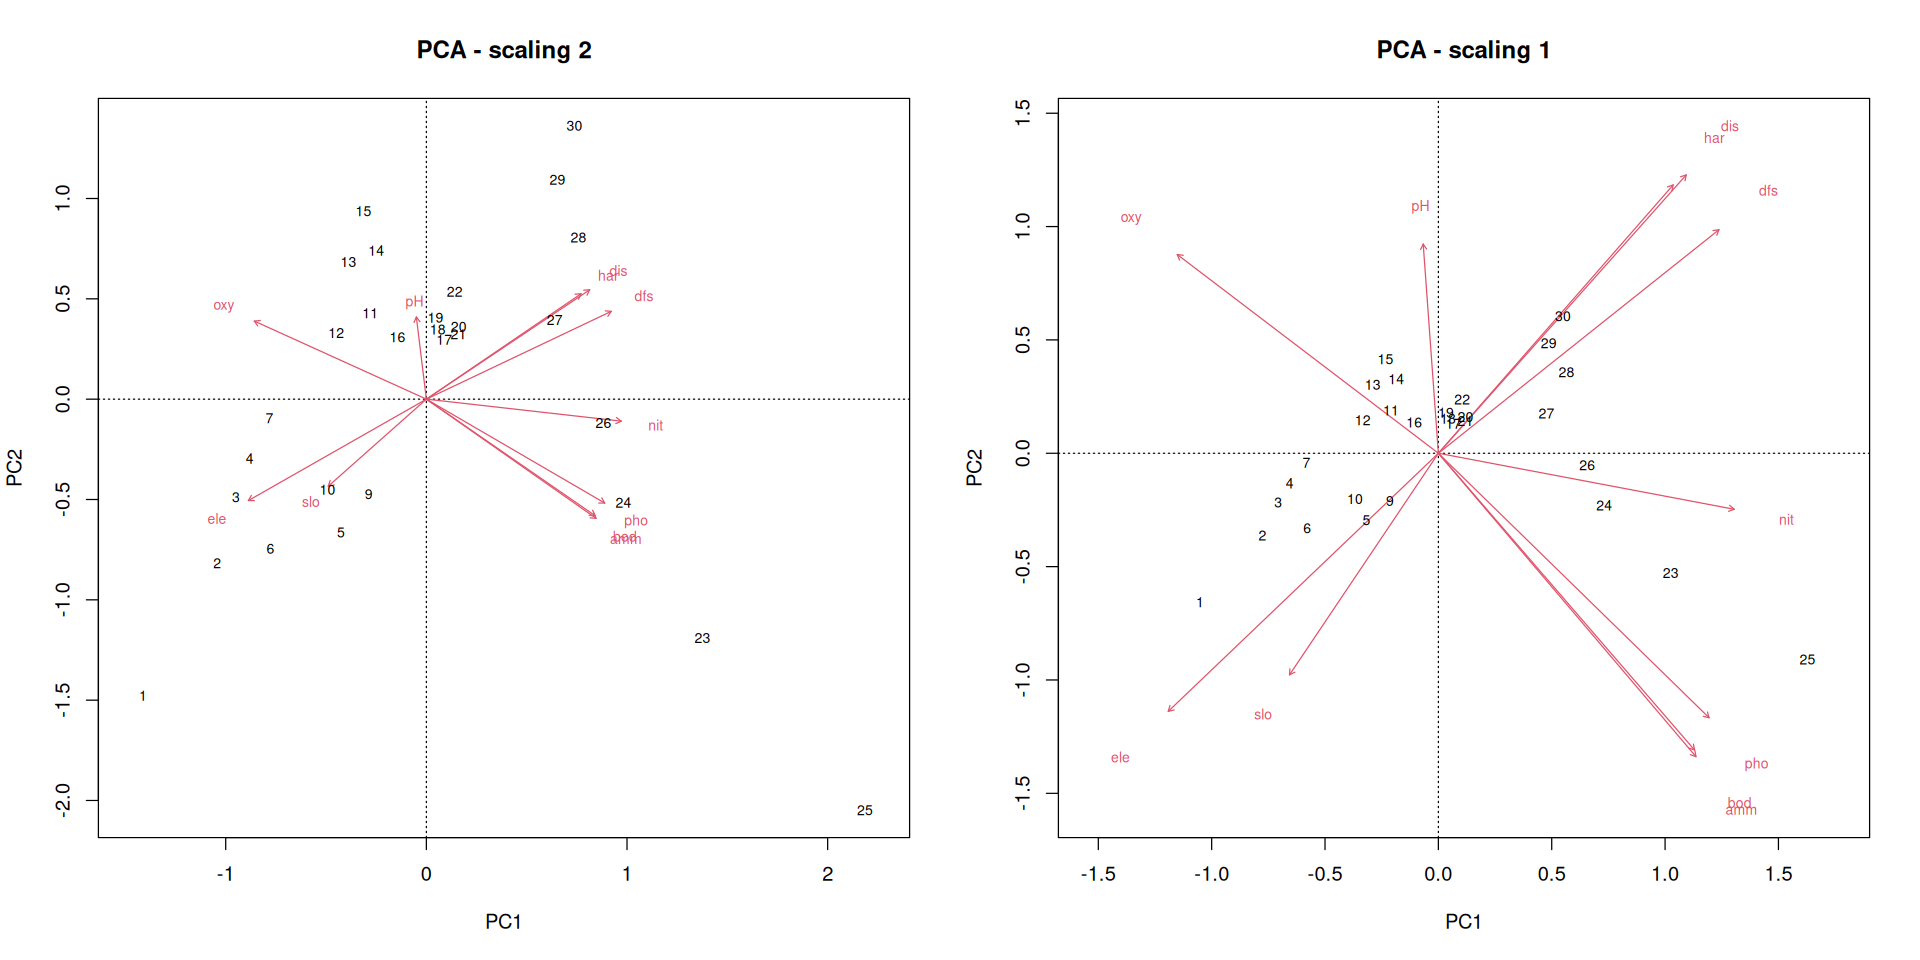

In [5]:
# Set plot size in Jupyter Notebook (16 x 8 inches)
options(repr.plot.width = 16, repr.plot.height = 8)

# Split the plotting area into 1 row and 2 columns (side-by-side plots)
par(mfrow = c(1, 2))

# Plot the PCA biplot using default scaling (scaling 2)
biplot(env.pca, main = "PCA - scaling 2")

# Plot the PCA biplot using scaling 1 (preserves sample distances)
biplot(env.pca, scaling = 1, main = "PCA - scaling 1")

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 4</span><br/><br/>

  1) Using the <code>boxplot()</code> function, display the boxplot of each variable in the <code>env</code> dataset.<br/><br/>

  2) What can you say about the scales of the variables? Are they directly comparable, or should they be standardized before comparison?<br/><br/>

  3) Using the <code> rda()</code> function, perform two principal component analyses (PCA) on the <code>env</code> dataset <br/><br/>

  - <code>env.pca1</code> :  PCA performed with <strong>standardized variables </strong> (centered and scaled)<br/>
  - <code>env.pca2</code> :  PCA performed without standardization.<br/><br/>

  4) Display both PCAs using the <code>biplot()</code> function with <code>scaling type 1</code> to visualize how the variables influence PC1 and PC2.<br/>
  
  5) What do you notice ? 
</div>


In [ ]:
# 1) Display the boxplot of each variable in the env dataset. (hint: use boxplot())

# Set plot size in Jupyter Notebook (16 x 8 inches)
options(repr.plot.width = 16, repr.plot.height = 8)
# Use the boxplot() function
___(___, las=2) # hint use the boxplot() function on the env dataset

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
      <code> <span style="color:blue;">boxplot</span>(<span style="color:blue;">env</span>, las=2) </code>
    <img src="images/Script5_Q1_boxplot.png" alt="kmeans code" style="max-width:100%;">
  </div>
</details>


<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  2) What can you say about the scales of the variables? Are they directly comparable, or should they be standardized before comparison?<br/><br/>

<form>
  <label><input type="radio" name="q5" value="1"> 1) The variables are directly comparable</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) The variabales should be standardized before being compared </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="2">  1) The variables are directly comparable</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) The variabales should be standardized before being compared</label><br/>
</form>
 <p><strong>note that dfs and ele have large values compared to the other parameter</strong></p>

</div>


In [ ]:
# 3) Using the  rda() function, perform two principal component analyses (PCA) on the env dataset
# env.pca1 : PCA performed with standardized variables (centered and scaled)
# env.pca2 : PCA performed without standardization.

env.pca1 <- ___(env, scale = ___) # PCA performed with standardized variables (centered and scaled)
env.pca2 <- ___(env, scale = ___) #  PCA performed without standardization.


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> env.pca1 <- <span style="color:blue;">rda</span>(env, scale = <span style="color:blue;">TRUE</span>) </code><br/>
    <code> env.pca2 <- <span style="color:blue;">rda</span>(env, scale = <span style="color:blue;">FALSE</span>) </code><br/>
  </div>
</details>


In [ ]:
# Set plot size in Jupyter Notebook (16 x 8 inches)
options(repr.plot.width = 16, repr.plot.height = 8)

# Split the plotting area into 1 row and 2 columns (side-by-side plots)
par(mfrow = c(1, 2))

___(env.pca1, scaling = ___, main = "PCA performed with standardized variables - scaling 1") # Scaling 1 met l’accent sur les variables
___(env.pca2, scaling = ___, main = "PCA performed without standardization. - scaling 1") #Scaling 1 met l’accent sur les variables 

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
      <code> <span style="color:blue;">biplot</span>(<span style="color:blue;">env.pca1</span>, scaling = <span style="color:blue;">1</span>, main = "PCA performed with standardized variables - scaling 1") </code>
            <code> <span style="color:blue;">biplot</span>(<span style="color:blue;">env.pca2</span>, scaling = <span style="color:blue;">1</span>,  main = "PCA performed without standardization. - scaling 1") </code>
    <img src="images/Script5_Q1_biplot.png" alt="kmeans code" style="max-width:100%;">
  </div>
</details>


<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  5) What do you notice ?<br/><br/>

<form>
  <label><input type="radio" name="q5" value="1"> 1) The biplot are the same</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) As the variables were not standardized on the env.pca2, the one that have way larger values (ele and dfs) have the biggest influence on the Principal components</label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">5) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="2">  1) The biplot are the same</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) As the variables were not standardized on the env.pca2, the one that have way larger values (ele and dfs) have the biggest influence on the Principal components</label><br/>
</form>
 <p><strong> dfs and ele have large values compared to the other parameter, we can see their influence on the principal components</strong></p>

</div>


<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 5</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        Here is an PCA on 4 physicochemical soil variables (pH,temperature, humidity, density) measured on 12 sites (1-12) <br/><br/><br/><br/>
        <strong>Which statements are correct? </strong>
    </div>
    <div style="margin-left: 20px;">
      <img src="images/Script5_Q5.png" alt="Skewed distribution" style="max-width: 500px; height: auto; border: 1px solid #ccc;" />
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Sites 2 and 12 are really similar</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Sites 7 and 8 are quite similar and have both high pH</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) Site 5 has a really high temperature</label><br/>
  <label><input type="radio" name="q5" value="4"> 4) Site 1 is the site characterised by the highest humidity</label><br/>
  <label><input type="radio" name="q5" value="5"> 5) Temperature contributes the most explaining differences among the 12 soil type</label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">


<form>
  <label><input type="radio" name="q5" value="1"> 1) Sites 2 and 12 are really similar</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) Sites 7 and 8 are quite similar and have both high pH</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) Site 5 has a really high temperature</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 4) Site 1 is the site characterised by the highest humidity</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 5) Temperature contributes the most explaining differences among the 12 soil type</label><br/>
</form>


  </div>
</details>


# 2 Correspondence analysis (CA) -> *cca(),summary(),screenplot(),envfit(), ordisurf()*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: left;">
    <img src="images/Script5_CA.png" width="40%" >
</div>

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 6</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        What type of distance is preserved when using a correpondence analysis ? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Euclidian Distance </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) χ2 distance </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Any distance measure </label><br/>
    
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="1"> 1) Euclidian Distance </label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) χ2 distance </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Any distance measure </label><br/>
</form>


  </div>
</details>



<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 7</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        For which type of data, is the CA generally adequate ? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Community Data</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Environnemental Data </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
   <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) Community Data</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Environnemental Data</label><br/>
</form>

<p><strong>CA is a suitable method for presence-absence or abundance , it also ignores the double zeros !
</strong></p>


  </div>
</details>



<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 8</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <br/>Two data scientists have finally collected enough samples to analyze the occurence of 130 species of a specific region. During their analysis, they observed that samples showed <strong>negative values</strong. <br/><br/>

        
They now aim to perform a <strong>Correspondence Analysis (CA)</strong> on the dataset.
            However, one of them raises a concern: <strong>“There might be a problem…”</strong> <br/>

<strong>What issue is the scientist referring to ? </strong>
    </div>
        
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Negative values and null vectors (objects or descriptors) in
the data matrix are not supported</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) 130 species is way to big to conduct a Correspondance analysis </label><br/>
    <label><input type="radio" name="q5" value="2"> 3) They should do a PCA instead of a CA </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
   <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) Negative values and null vectors (objects or descriptors) in
the data matrix are not supported</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) 130 species is way to big to conduct a Correspondance analysis</label><br/>
    <label><input type="radio" name="q5" value="2"> 3) They should do a PCA instead of a CA </label><br/>
</form>

<p><strong>The issue lies in the fact that Correspondence Analysis (CA) is a method designed for non-negative contingency tables, typically containing frequencies or counts. The presence of negative valuesrenders CA mathematically inappropriate because the chi-squared distance it relies on cannot be computed with negative inputs.
</strong></p>


  </div>
</details>



### 2.0.1 CA computation based on a dataframe  -> ***cca**(`df`)*

*CA computation based on a presence-absence dataframe* 

- **`df`** → *presence-absence Dataframe on which we compute the CA*  

**outputs :**

- **Inertia (explained variance)** :

  - `"Total"`: Total variance explained by all variables 
  - `"Unconstrained"`: Total variance explained, specifying that this is an unconstrained analysis

    
- **Rank** :

  - `"Unconstrained"`: Number of possible non-null principal components (rank of data matrix)

  
- **Inertia is scaled chi-sqaure** : the inertia corresponds to the chi-square statistic divided by the total sum of observations,

- **Eigenvalues for unconstrained axes:** : Each eigenvalue (PC1, PC2, etc.) corresponds to the variance explained by that principal component

## 2.1 Compute CA on spe data

In [ ]:
# Perform Correspondence Analysis (CA) on the dataset 'spe'
spe.ca <- cca(spe)

# Display the CA result stored in 'spe.ca'
spe.ca

### 2.0.2 Display a summary of the CA components -> ***summary**(ca_object,scaling =)*

- **`ca_object`** → *CA computed using cca()*  
- **`summary()`** → *Show the summary of the cCA components*
- **`scaling`** → *species or sites oriented*
  
  - `"1"`: Scaling 1 → *Focus on species (Norm of eigenvectors = 1)*
  - `"2"`/`""`: Scaling 2 (by default) → *Focus on sites (Norm of eigenvectors = square root of eigenvalues)*
    
**outputs :**

- **Eigenvalues, and their contribution to the correlations** :

  - `"Eigenvalue"`:  Eigenvalue of each principal component (PC1, PC2, PC3, PC4). It represents the amount of variance explained by that component. 
  - `"Proportion Explained "`: The proportion of the total variance explained by each individual principal component.
  - `"Cumulative Proportion"`: The cumulative proportion of variance explained by adding successive principal components.



## 2.2 Display CA summary of spe data

In [ ]:
# Display a summary of the CA results with the default scaling (scaling = 2),
# which emphasizes relationships among sites (samples).
summary(spe.ca)            

# Display a summary of the CA results with scaling = 1,
# which emphasizes relationships among species.
summary(spe.ca, scaling = 1)  


## 2.2 Screeenplot of the CA object 

In [ ]:
# Set plot size in Jupyter Notebook (16 x 8 inches)
options(repr.plot.width = 16, repr.plot.height = 8)
# Scree plot and broken stick model using vegan's screeplot.cca()
screeplot(spe.ca, bstick = TRUE, npcs = length(spe.ca$CA$eig))

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 9</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <br/>Based on the screenplot above, how <strong>many principal axes</strong> should we take into account ?  <br/><br/>
 <i>hint : principal axes which explain less variance than a
                    random model (broken stick) should not be interpreted</i><br/><br/>
    
  </div>
</div>
<form>
  <label><input type="radio" name="q5" value="1"> 1</label><br/>
  <label><input type="radio" name="q5" value="2"> 2 </label><br/>
    <label><input type="radio" name="q5" value="2"> 3 </label><br/>
        <label><input type="radio" name="q5" value="2"> 4 </label><br/>
        <label><input type="radio" name="q5" value="2"> 5 </label><br/>
</form>



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="2"> 1</label><br/>
  <label><input type="radio" name="q5" value="2"> 2</label><br/>
    <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 3 </label><br/>
    <label><input type="radio" name="q5" value="2"> 4</label><br/>
    <label><input type="radio" name="q5" value="2"> 5</label><br/>
</form>

<p><strong>As we can see, the random model explains more variance when we have 4 principal components
</strong></p>


  </div>
</details>



## 2.2 Biplot of the CA object 

In [ ]:
# Set plot size in Jupyter Notebook (20 x 8 inches)
options(repr.plot.width = 20, repr.plot.height = 8)
# CA biplots
par(mfrow = c(1, 2))
# Scaling 1: sites are centroids of species
plot(spe.ca, 
     scaling = 1, 
     main = "CA fish abundances - biplot scaling 1"
)
# Scaling 2 (default): species are centroids of sites
plot(spe.ca, main = "CA fish abundances - biplot scaling 2")


### 2.0.2 Fit environmental variables to an ordination -> **envfit**(*ca_object* ~ *variables, env_data*)

- **`ca_object`** → *CA computed using cca()*  
- **`~ variables`** → *Formula specifying which environmental variables to fit*
- **`env_data `** → *Data frame containing the environmental variables*
  
**outputs :**

- **envfit output** :

    The envfit object contains vectors (arrows) associated with quantitative environmental variables.
      Each variable is represented by:
  - `"Coordinates on the ordination axes (e.g., CA1, CA2) "`:  Indicate the direction of the gradient
  - `"r²"`:  strength of the relationship between the variable and the ordination (closer to 1 = stronger relationship)
  - `"p-value (Pr(>r))"`: statistical significance of the relationship (based on permutation test)



## 2.3 Fit ammonium concentration and distance to the correspondance analysis on the `spe` dataset

In [ ]:
# Fit environmental variables (dis and amm) onto the ordination (CA)
spe.ca.env <- envfit(spe.ca ~ dis + amm, env)

# Display the summary of the envfit result (correlations, r², p-values)
spe.ca.env

# Set plot size in Jupyter Notebook (10 x 10 inches)
options(repr.plot.width = 10, repr.plot.height = 10)
# First, plot the ordination result (CA biplot)
plot(spe.ca)

# Then, overlay the environmental vectors (arrows) onto the ordination plot
# This shows the direction and strength of each environmental gradient
plot(spe.ca.env)  # Optional: you can add `p.max = 0.1` to only show significant vectors


### 2.0.2 Fit smooth surfaces of environmental variables to an ordination → **ordisurf**(*ca_object*, df$*col*, *add = *)

- **`ca_object`** → *CA computed using cca()*  
- **`df$col`** → *Specifying a single quantitative environmental variable to fit as a smooth surface*
- **`add =  `** → *whether to add the fitted surface (contour lines) to an existing plot (add = `TRUE`) or to create a new plot from scratch (add = `FALSE`, the default).*
  
**outputs :**

- **ordisurf output** :

    Ordisurf object fits a smooth surface (e.g., a GAM) of a numeric environmental variable over the ordination space.
    It produces a response surface showing how the variable varies across the ordination.


## 2.4 Correspondance analysis on the `spe` dataset with dfs represented as contours using *ordisurf()*

In [ ]:
# Set plot size in Jupyter Notebook (10 x 10 inches)
options(repr.plot.width = 10, repr.plot.height = 10)
plot(spe.ca)                  # Plot the ordination result to create a base graph
ordisurf(spe.ca, env$dfs, add = TRUE)  # Add smooth contour lines of the environmental variable 'dfs' onto the existing plot
title(main = "Ordination plot with smoothed environmental variable contours") 



# 3 Principal coordinate analysis (PCoA) -> *vegdist(),cmdscale(),ordiplot(),wascores()*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: left;">
    <img src="images/PCOA.png" width="60%" >
</div>

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 10</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        What type of distance is preserved when using a Principal Coordinate analysis ? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Euclidian Distance </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) χ2 distance </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Any distance measure </label><br/>
    
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="1"> 1) Euclidian Distance </label><br/>
  <label><input type="radio" name="q5" value="1">  2) χ2 distance </label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  2) Any distance measure </label><br/>
</form>


  </div>
</details>



<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 11</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        What types of variables can be used in a Principal Coordinate analysis ? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Only quantitative </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Quantitative and semi-quantitative </label><br/>
  <label><input type="radio" name="q5" value="2"> 3) Quantitative, semi-quantitative, qualitative or mixed </label><br/>
    
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="1"> 1) Only quantitative </label><br/>
  <label><input type="radio" name="q5" value="1">  2) Quantitative and semi-quantitative  </label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  3) Quantitative, semi-quantitative, qualitative or mixed </label><br/>
</form>


  </div>
</details>



<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 12</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        What is one advantage of using PCoA instead of CA? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) PCOa is less sensible to rare species </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) PCOa can allow the joint analysis of objects and descriptors </label><br/>
  <label><input type="radio" name="q5" value="2"> 3) Both are correct </label><br/>
    
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">1) PCOa is less sensible to rare species  </label><br/>
  <label><input type="radio" name="q5" value="1">  2) PCOa can allow the joint analysis of objects and descriptors  </label><br/>
    <label><input type="radio" name="q5" value="1"> 3) Both are correct  </label><br/>
</form>


  </div>
</details>



### 3.0.1 Perform classical multidimensional scaling (PCoA) → **cmdscale**( *distance_matrix*, *k = 2*, *eig = TRUE* )

- **`distance_matrix`** → *A dissimilarity or distance matrix (e.g., Bray-Curtis, Euclidean)*  
- **`k`** → *Number of dimensions to return (default 2)*  
- **`eig`** → *Whether to return eigenvalues (default TRUE)*

**outputs :**

- **cmdscale output** :

    The cmdscale function returns coordinates of points in a lower-dimensional Euclidean space that best approximate the original distance matrix.  
    The output contains:

  - `"points"`: coordinates of each sample in the reduced k-dimensional space  
  - `"eig"`: eigenvalues indicating the variation explained by each axis (if `eig = TRUE`)  
  - `"GOF"`: goodness-of-fit measures describing how well the distances are represented in the reduced space


## 3.1 PCOa on the `spe` dataset

In [ ]:
# Compute a Bray-Curtis dissimilarity matrix from the species dataset
spe.bray <- vegdist(spe)  

# Perform classical multidimensional scaling (PCoA) on the Bray-Curtis distance matrix
# Return coordinates in 2 dimensions and include eigenvalues
spe.b.pcoa <- cmdscale(spe.bray, k = 2, eig = TRUE)

#display the cmdscale output
spe.b.pcoa

### 3.0.2 Plot an ordination object → **ordiplot**(*ordination_object*, *type = "t"*, *display = "sites"*, *...*)

- **`ordination_object`** → *An ordination result object (e.g., output from cmdscale, cca, rda, metaMDS)*  
- **`type`** → *Type of plot: "points", "text" ("t"), or "none"* (default is `"t"`)  
- **`display`** → *Which elements to display: `"sites"` (samples), `"species"` (variables), or `"bp"` (biplot scores)*  
- **`...`** → *Additional graphical parameters*

**outputs :**

- **ordiplot output** :

    The ordiplot function produces a 2D plot of the ordination object, showing sample points, species, or environmental variables depending on the `display` parameter.  
    It returns a plot with coordinates on the ordination axes, useful for visual interpretation of ecological gradients or sample relationships.


### 3.0.3 Calculate weighted average scores for environmental variables → **wascores**(*ordination_scores*, *df*)

- **`ordination_scores`** → *A matrix or data frame of site (sample) scores from an ordination (e.g., site scores from cmdscale, cca, rda)*  
- **`df`** → *dataframe used to calculate the ordination score*

**outputs :**

- **wascores output** :

    The wascores function calculates the weighted average scores of the environmental variable along the ordination axes.  
    It returns a vector of coordinates representing the position of the environmental variable in the ordination space based on the weighted average of site scores weighted by the variable values.


## 3.2 Project descriptors a posteriori onto PCoA (Species and environnemental parameters vectors)

In [ ]:
# Plot the ordination scores of sites from the first two PCoA axes as text labels
ordiplot(scores(spe.b.pcoa, choices = c(1, 2)),
         type = "text",
         main = "PCoA with species weighted averages")

# Calculate weighted average scores of species based on site coordinates in PCoA space
spe.wa <- wascores(spe.b.pcoa$points[, 1:2], spe)

# Add species names at their weighted average positions on the plot in red, smaller font
text(spe.wa, rownames(spe.wa), cex = 0.7, col = "red")

# Perform envfit to fit environmental variables onto the PCoA ordination
spe.b.pcoa.env <- envfit(spe.b.pcoa, env)

# Display the results of the envfit, including significance and vector directions
spe.b.pcoa.env

# Set plot size in Jupyter Notebook (12 x 12 inches)
options(repr.plot.width = 12, repr.plot.height = 12)
# Plot only significant environmental variables (p-value < 0.05) onto the ordination plot
# Using color code 3 (typically green)
plot(spe.b.pcoa.env, p.max = 0.05, col = 3)


# 4 Non-Metric Multi-Dimensional Scaling (NMDS) -> *metaMDS(),stressplot(),goodness()*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: left;">
    <img src="images/NMDS.png" width="40%" >
</div>

### 4.0.1 Perform Non-metric Multidimensional Scaling (NMDS) → **metaMDS**( *df*,*distance =*)

- **`df`** → *dataframe on which computing the NMDS*  
- **`distance`** → *type of distance matrix on which we want to compute the NMDS*  
**outputs :**

- **metaMDS output** :

    The metaMDS function performs NMDS by iteratively searching for a stable configuration that best represents the rank order of distances in a lower-dimensional space.  
    The output contains:

  - `"Successive Runs (Run 0, Run 1, …):"`: Each "run" is a random starting configuration to search for the best NMDS solution in 2D (or k dimensions). The number of runs is limited by trymax.  
  - `"Procrustes (rmse and max resid)"`: Procrustes comparison is performed between the new solution and the current best :
       - - `"rmse"`: Root mean square error between configurations
       - - `"resid"`: Largest individual residual (local difference)
  - `"Dimensions"`: Number of axes asked to be represented 
  - `"Stress"`: Stress value indicates how well the distances are preserved — the lower the stress, the better the representation.  
  - `"Stress type"`:Indicates the type of stress used  
  - `"Best solution was repeated ..."`: How many times the best solution has been repeated during the tries  
  - `"The best solution was from try.."`: At which try did we find the best solution


## 4.1 Perform NMDS on the spe dataset using the bray-curtis distance matrix

In [ ]:
# Perform Non-metric Multidimensional Scaling (NMDS) on the 'spe' dataset
# using Bray-Curtis dissimilarity
spe.nmds <- metaMDS(spe, distance = "bray")

#Display the NMDS outputs
spe.nmds

## 4.2 Plot NMDS ordination result on the spe dataset 

In [ ]:
# Set plot size in Jupyter Notebook (12 x 12 inches)
options(repr.plot.width = 10, repr.plot.height = 10)
# Plot the NMDS ordination result
plot(spe.nmds, 
     type = "t", 
     main = paste("NMDS Bray-Curtis; Stress =", round(spe.nmds$stress, 3)))


# 5 Shepard plot and goodness of fit -> *stressplot(), goodness()*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: left;">
    <img src="images/Shepard_diagram_goodnes_fit.png" width="60%" >
</div>

### 5.0.1 Visualize NMDS Fit Accuracy → **stressplot**( *nmds_result* )

- **`nmds_result`** → *Object resulting from the `metaMDS` function*  

**outputs :**

- **stressplot output** :

    The `stressplot` function displays a **Shepard plot**, which helps assess the **goodness-of-fit** of the NMDS ordination.  
    It compares the observed dissimilarities with the distances between points in the reduced NMDS space. The output includes:

  - `"X-axis (Observed Dissimilarities)"` : Pairwise dissimilarities from the original distance matrix (e.g., Bray-Curtis)  
  - `"Y-axis (Ordination Distances)"` : Corresponding distances between points in the NMDS space  
  - `"Points"` : Each point is a sample pair — shows how well that pair’s distance is preserved in the ordination  
  - `"Shepard curve"` : A smoothed trend line summarizing the relationship between original and ordinated distances  
  - `"Non-metric fit R²"` : Indicates how well the **rank order** of distances is preserved (ideal NMDS target) — closer to 1 is better  
  - `"Linear fit R²"` : Indicates how well the **raw distances** are preserved (optional, more relevant to metric MDS)

This plot is used to visually evaluate the amount of distortion caused by dimensionality reduction.  
A **tight cloud of points around the Shepard curve** with a **high non-metric R²** means the NMDS is a good representation.


## 5.1 Plot shepard for the NMDS result on the spe dataset 

In [ ]:
# Plot a Shepard plot for the NMDS result
stressplot(spe.nmds, main = "Shepard plot")

### 5.0.2 Assess Sample-wise Fit Quality → **goodness**( *nmds_result* )

- **`nmds_result`** → *Object resulting from the `metaMDS` function*  

**outputs :**

- **goodness output** :

The `goodness` function returns a numeric vector showing the **fit quality for each individual sample** in the NMDS ordination.  
It quantifies how well each sample’s position in the reduced space preserves its original dissimilarities.

- **`Goodness values`** : One value per sample, representing the **distance between the original and ordinated configuration** for that sample  
- **`Interpretation`** :  
   - **Low values** = good fit (the sample is well-represented in the NMDS space)  
   - **High values** = poor fit (the sample's position in reduced space is less accurate)  



## 5.2 Assess Sample-wise Fit Quality for the `spe` dataset, and plot circle proportionnaly to the quality of the NDMS for each sample

In [ ]:
# Compute the goodness-of-fit values for each sample from the NMDS result 'spe.nmds'.
# 'gof' will be a numeric vector where each value indicates how well a given sample is represented in the NMDS space.
gof <- goodness(spe.nmds)
gof

In [ ]:
# Plot the NMDS ordination with sample labels 
plot(spe.nmds, type = "t", main = "Goodness of fit")

# Overlay the site points (samples) on the same plot
# The size of each point is scaled according to its goodness-of-fit value (gof * 300)
# Larger points indicate poorer fit (higher residuals), smaller points indicate better fit
points(spe.nmds, display = "sites", cex = gof * 300)
